In [99]:
%cd ~/SSMuLA

Loading BokehJS ...

/disk2/fli/SSMuLA


In [100]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [101]:
from ast import literal_eval

import pandas as pd

from scipy.stats import spearmanr, ttest_ind

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap, to_rgb
import seaborn as sns

# import bokeh
# from bokeh.io import show, export_svg, export_png, output_notebook
# from bokeh.plotting import show, figure
# from bokeh.themes.theme import Theme

# import holoviews as hv
# from holoviews import opts, dim

# # for html to png
# from selenium import webdriver
# from selenium.webdriver.firefox.service import Service
# from selenium.webdriver.firefox.options import Options
from SSMuLA.fitness_process_vis import parse_lib_stat
from SSMuLA.landscape_global import LIB_INFO_DICT
# from SSMuLA.de_simulations import DE_TYPES
from SSMuLA.zs_analysis import ZS_OPTS, ZS_COMB_OPTS
from SSMuLA.vis_summary import ZS_METRICS, ZS_COLOR_MAP_APPENDED, ZS_OPTS_APPENDED
# from SSMuLA.get_corr import LANDSCAPE_ATTRIBUTES, val_list, zs_list
from SSMuLA.vis import PRESENTATION_PALETTE_SATURATE, save_plt
# from SSMuLA.util import checkNgen_folder


# get msa factors
from SSMuLA.zs_data import EV_META
# from SSMuLA.landscape_global import get_file_name, n_mut_cutoff_dict
# from SSMuLA.de_simulations import DE_TYPES
from SSMuLA.zs_analysis import ZS_OPTS, ZS_COMB_OPTS, ZS_OPTS_LEGEND
from SSMuLA.vis_summary import N_SAMPLE_LIST, N_MUT_SUBS, ZS_METRICS, ZS_N_MUTS
# from SSMuLA.vis import LIB_COLORS, save_bokeh_hv
# from SSMuLA.util import checkNgen_folder

%matplotlib inline

In [102]:
# Custom colormap for the MSE row, using greens
cmap_mse = LinearSegmentedColormap.from_list(
    "mse_cmap_r", ["#FFFFFF", "#9bbb59"][::-1], N=100
)  # dark to light green

# Create the colormap
custom_cmap = LinearSegmentedColormap.from_list(
    "bwg",
    [
        PRESENTATION_PALETTE_SATURATE["blue"],
        "white",
        PRESENTATION_PALETTE_SATURATE["green"],
    ],
    N=100,
)

custom_cmap_r = LinearSegmentedColormap.from_list(
    "bwg_r",
    [
        sns.dark_palette("seagreen").as_hex()[-1],
        "white",
        sns.color_palette("Blues").as_hex()[-1],
    ],
    N=100,
)

de_metrics = ["mean_all", "fraction_max"]

simple_des = {
    "recomb_SSM": "Recomb",
    "single_step_DE": "Single step",
    "top96_SSM": "Top96 recomb",
}

five_zs = {
 'ed_score': PRESENTATION_PALETTE_SATURATE["blue"],
 'ev_score': PRESENTATION_PALETTE_SATURATE["green"],
 'esm_score': PRESENTATION_PALETTE_SATURATE["purple"],
 'esmif_score': PRESENTATION_PALETTE_SATURATE["yellow"],
 "coves_score": PRESENTATION_PALETTE_SATURATE["brown"],
 'Triad_score': PRESENTATION_PALETTE_SATURATE["orange"],
 }

In [103]:
zs_csv = "results/zs_sum_5/none/zs_stat_scale2max.csv"

n_mut = "all"
metricr = "rho"

In [104]:
zs_df = pd.read_csv(zs_csv)
zs_df

,lib,n_mut,scale_type,ed_score,Triad_score,ev_score,esm_score,esmif_score,coves_score,Triad-ev_score,Triad-esm_score,struc-comb_score,msanoif-comb_score,msa-comb_score,structnmsa-comb_score,two-best_score
0,DHFR,all,max,"{'rho': 0.25115364784680605, 'ndcg': 0.9148031...","{'rho': 0.017800602737355977, 'ndcg': 0.874706...","{'rho': 0.3396500541186067, 'ndcg': 0.94705812...","{'rho': 0.2997147334642927, 'ndcg': 0.93412887...","{'rho': 0.3420102237927515, 'ndcg': 0.94530250...","{'rho': -0.0340652892242752, 'ndcg': 0.8749346...","{'rho': 0.23090332337249703, 'ndcg': 0.9008350...","{'rho': 0.20424667302483043, 'ndcg': 0.8962477...","{'rho': 0.21873645360229155, 'ndcg': 0.9010558...","{'rho': 0.3329620349497645, 'ndcg': 0.94020086...","{'rho': 0.35054254084284997, 'ndcg': 0.9449015...","{'rho': 0.3152181002051771, 'ndcg': 0.92293221...","{'rho': 0.3572732194614853, 'ndcg': 0.94923945..."
1,GB1,all,max,"{'rho': 0.1449275437059576, 'ndcg': 0.68739614...","{'rho': 0.2882819770014877, 'ndcg': 0.76404913...","{'rho': 0.18950853197890194, 'ndcg': 0.7215575...","{'rho': 0.08033543850645883, 'ndcg': 0.7016796...","{'rho': 0.29349648314848165, 'ndcg': 0.7536404...","{'rho': 0.2642675382803584, 'ndcg': 0.73724809...","{'rho': 0.27981217554750343, 'ndcg': 0.7521803...","{'rho': 0.21772991088329988, 'ndcg': 0.7424266...","{'rho': 0.3165424232001679, 'ndcg': 0.76648219...","{'rho': 0.14175871216515606, 'ndcg': 0.7115697...","{'rho': 0.21368724000610942, 'ndcg': 0.7341220...","{'rho': 0.2591091741511955, 'ndcg': 0.74743562...","{'rho': 0.2707210453110122, 'ndcg': 0.74809457..."
2,ParD2,all,max,"{'rho': 0.2975524544704858, 'ndcg': 0.94358830...","{'rho': 0.22903279275812125, 'ndcg': 0.9096686...","{'rho': 0.43950580411448875, 'ndcg': 0.9509634...","{'rho': 0.5086085705240099, 'ndcg': 0.96848213...","{'rho': 0.5474025505415586, 'ndcg': 0.96654986...","{'rho': 0.5495115971725073, 'ndcg': 0.95702682...","{'rho': 0.4306774463016622, 'ndcg': 0.94973751...","{'rho': 0.4543061185610589, 'ndcg': 0.95563704...","{'rho': 0.4307416392960829, 'ndcg': 0.94590129...","{'rho': 0.5060856131857661, 'ndcg': 0.96738107...","{'rho': 0.5578082401554308, 'ndcg': 0.97195573...","{'rho': 0.5462223690973439, 'ndcg': 0.96811505...","{'rho': 0.5460002992284186, 'ndcg': 0.96682268..."
3,ParD3,all,max,"{'rho': 0.45637056042996815, 'ndcg': 0.9695382...","{'rho': 0.2850094413250776, 'ndcg': 0.92655737...","{'rho': 0.46081667207091903, 'ndcg': 0.9712806...","{'rho': 0.5831577250662513, 'ndcg': 0.98204147...","{'rho': 0.6010278304483516, 'ndcg': 0.96236309...","{'rho': 0.6219880633980583, 'ndcg': 0.96633567...","{'rho': 0.5386802032349772, 'ndcg': 0.95858089...","{'rho': 0.6205810094850255, 'ndcg': 0.96546870...","{'rho': 0.48086112698498235, 'ndcg': 0.9456578...","{'rho': 0.5431052882445438, 'ndcg': 0.97931590...","{'rho': 0.6111206470597818, 'ndcg': 0.97596838...","{'rho': 0.6499730615911018, 'ndcg': 0.97073551...","{'rho': 0.5919584300701194, 'ndcg': 0.96673702..."
4,T7,all,max,"{'rho': 0.12344532514945583, 'ndcg': 0.6115612...","{'rho': 0.002387857602889967, 'ndcg': 0.498029...","{'rho': 0.07366232086980025, 'ndcg': 0.6198881...","{'rho': 0.0684032568255592, 'ndcg': 0.59581066...","{'rho': 0.02586771999361854, 'ndcg': 0.4908881...","{'rho': 0.07496802667033464, 'ndcg': 0.5862648...","{'rho': 0.05546878052196785, 'ndcg': 0.5559375...","{'rho': 0.045314346415069554, 'ndcg': 0.529582...","{'rho': 0.016371309612727165, 'ndcg': 0.505177...","{'rho': 0.0743259836642462, 'ndcg': 0.61042790...","{'rho': 0.06443862151036057, 'ndcg': 0.5726966...","{'rho': 0.060012828101848194, 'ndcg': 0.569982...","{'rho': 0.055801196902665266, 'ndcg': 0.540136..."
5,TEV,all,max,"{'rho': 0.11971521106989151, 'ndcg': 0.9926527...","{'rho': 0.0955905123208095, 'ndcg': 0.99281065...","{'rho': 0.12551850958785035, 'ndcg': 0.9934824...","{'rho': 0.11758880430776296, 'ndcg': 0.9931417...","{'rho': 0.12908140951127015, 'ndcg': 0.9934873...","{'rho': 0.06445541375234691, 'ndcg': 0.9917388...","{'rho': 0.1230

In [105]:
ZS_COMB_OPTS

['Triad-ev_score',
 'Triad-esm_score',
 'struc-comb_score',
 'msanoif-comb_score',
 'msa-comb_score',
 'structnmsa-comb_score',
 'two-best_score']

In [106]:
n_mut = "all"

zs_df_list = [zs_df[["lib", "n_mut"]]]
# Create new columns for each score type
for c in ZS_OPTS + ZS_COMB_OPTS:

    zs_name = c.replace("_score", "")
    zs_df_list.append(
        zs_df[f"{zs_name}_score"]
        .str.replace(": nan", ": None")
        .apply(literal_eval)
        .apply(pd.Series)
        .rename(columns={m: f"{zs_name}_{m}" for m in ZS_METRICS})
    )

zs_df_expend = pd.concat(zs_df_list, axis=1)

zs_mut_df_list = [zs_df_expend[zs_df_expend["n_mut"] == n_mut]["lib"]]
for n_mut in ZS_N_MUTS:
    slice_df = (
        zs_df_expend[zs_df_expend["n_mut"] == n_mut]
        .drop(columns=["lib", "n_mut"])
        .reset_index(drop=True)
    )
    zs_mut_df_list.append(
        slice_df.rename(columns={c: f"{n_mut}_{c}" for c in slice_df.columns})
    )
zs_df = pd.concat(zs_mut_df_list, axis=1)
zs_df

,lib,all_ed_rho,all_ed_ndcg,all_ed_rocauc,all_ev_rho,all_ev_ndcg,all_ev_rocauc,all_esm_rho,all_esm_ndcg,all_esm_rocauc,...,single_msanoif-comb_rocauc,single_msa-comb_rho,single_msa-comb_ndcg,single_msa-comb_rocauc,single_structnmsa-comb_rho,single_structnmsa-comb_ndcg,single_structnmsa-comb_rocauc,single_two-best_rho,single_two-best_ndcg,single_two-best_rocauc
0,DHFR,0.251154,0.914803,0.719973,0.339650,0.947058,0.912765,0.299715,0.934129,0.848592,...,0.917361,0.553279,0.891577,0.911111,-0.212895,0.800908,0.320833,0.555344,0.897379,0.900000
1,GB1,0.144928,0.687396,0.577572,0.189509,0.721558,0.627690,0.080335,0.701680,0.558014,...,0.588512,0.774073,0.784778,0.897363,0.811746,0.786033,0.916196,0.779265,0.788547,0.898305
2,ParD2,0.297552,0.943588,0.552103,0.439506,0.950963,0.664011,0.508609,0.968482,0.701737,...,0.842105,0.676766,0.977412,0.947368,0.687594,0.988506,0.964912,0.674367,0.976621,0.947368
3,ParD3,0.456371,0.969538,0.564976,0.460817,0.971281,0.705520,0.583158,0.982041,0.755986,...,NaN,0.369282,0.995510,NaN,0.337783,0.993260,NaN,0.362577,0.995431,NaN
4,T7,0.123445,0.611561,0.625880,0.073662,0.619888,0.626332,0.068403,0.595811,0.607808,...,0.534444,0.241319,0.818903,0.662222,0.278265,0.743581,0.771111,0.247554,0.826064,0.666667
5,TEV,0.119715,0.992653,0.558518,0.125519,0.993482,0.584816,0.117589,0.993142,0.570008,...,0.808984,0.734183,0.964957,0.886570,0.732557,0.962853,0.868421,0.734003,0.967017,0.886570
6,TrpB3A,0.177658,0.987543,0.608694,0.130969,0.989105,0.657328,0.199229,0.988920,0.690492,...,0.862269,0.428879,0.967964,0.850694,0.191181,0.877321,0.646991,0.441304,0.967677,0.863426
7,TrpB3B,0.021137,0.987234,0.551217,0.074495,0.988502,0.583225,0.053335,0.988071,0.659787,...,0.975309,0.352419,0.972462,0.981481,0.176627,0.941640,0.796296,0.367140,0.975559,0.972222
8,TrpB3C,0.064914,0.983205,0.605496,0.111510,0.984379,0.539872,0.065783,0.984411,0.580109,...,0.981818,0.361055,0.959543,1.000000,0.277220,0.954619,0.996970,0.386139,0.950518,0.993939
9,TrpB3D,0.113428,0.972850,0.609910,0.229525,0.980522,0.785684,0.221182,0.979785,0.745673,...,0.745658,0.400376,0.867780,0.682382,0.378123,0.831905,0.699132,0.377664,0.851802,0.678040


In [107]:
lib_stat = parse_lib_stat("results/fitness_distribution/max/all_lib_stats.csv", n_mut_cuttoff=0)
lib_stat

,lib,n_site,numb_measured,percent_measured,numb_active,percent_active,active_fit_min,parent_fit,parent_rank,mean,...,scale,peaks,peak_kde,percentiles,pdf_values,parent_rank_percent,Q1,Q2,Q3,numb_kde_peak
0,DHFR,3.0,8000.0,100.000000,854.0,10.675000,0.158614,0.231325,602.0,0.157945,...,1.737006e-03,"[0.1275662158236592, 0.5084256342965795, 0.606...","[18.95715826406059, 0.17704519880582167, 0.098...","[0.1151661417338432, 0.1212571134074551, 0.122...","[15.199742695395578, 15.667091596432273, 16.11...",0.075250,0.125979,0.127567,0.129802,7
3,ParD2,3.0,7882.0,98.525000,6533.0,82.885055,0.000087,0.973896,12.0,0.228092,...,1.099060e-01,"[0.03337870027347259, 0.6106664209434821, 0.85...","[2.870133679609529, 0.40012326949250876, 0.421...","[-0.2192609576095971, -0.11180451121954202, -0...","[0.026974121384613872, 0.028121215058096317, 0...",0.001522,0.023743,0.112118,0.374642,3
6,ParD3,3.0,7882.0,98.525000,7248.0,91.956356,0.000485,0.982799,7.0,0.321921,...,1.567318e-01,"[0.12255350949782506, 0.2818697911295817, 0.89...","[1.5849621685610578, 1.5168268815479706, 0.556...","[-0.2057345859857947, -0.0879267691331092, -0....","[0.01869666257662742, 0.01949003646085834, 0.0...",0.000888,0.112217,0.276349,0.470212,3
9,GB1,4.0,149361.0,93.350625,34545.0,23.128528,0.001141,0.114130,3644.0,0.009189,...,2.786774e-04,"[0.001001001001001001, 0.15015015015015015, 0....","[84.94812751924495, 0.14711297529110418, 0.091...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[84.45520645025827, 84.94812751924495, 80.8935...",0.024397,0.000156,0.000386,0.001026,33
12,T7,3.0,6725.0,84.062500,234.0,3.479554,0.176534,0.288006,163.0,0.016500,...,3.213795e-20,"[0.12212212212212212, 0.22022022022022023, 0.2...","[0.1355385385042058, 0.10759849737430795, 0.09...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[25.89058161801743, 25.83678275907177, 25.6612...",0.024238,0.000000,0.000000,0.000000,11
15,TEV,4.0,159132.0,99.457500,18262.0,11.476007,0.035601,0.295036,665.0,-0.012509,...,1.890048e-02,"[-0.7917824701915064, -0.7605090595208127, -0....","[0.0036245994071766735, 0.0021495792852726805,...","[-0.8377727800013499, -0.26246975122161975, -0...","[0.13783458085674552, 0.1361875808265587, 0.12...",0.004179,-0.030314,-0.011234,0.008629,27
18,TrpB3A,3.0,7971.0,99.637500,59.0,0.740183,0.097444,1.000000,1.0,-0.039231,...,2.442504e-02,"[-0.3944951616078841, -0.3170232081852239, -0....","[0.005954476272084834, 0.020369915569709816, 0...","[-0.5794792136579096, -0.159409524561979, -0.1...","[0.005958068940422161, 0.005853464928384218, 0...",0.000125,-0.066102,-0.039751,-0.013193,9
21,TrpB3B,3.0,7996.0,99.950000,18.0,0.225113,0.086085,1.000000,1.0,-0.055223,...,1.793460e-02,"[-0.3315353103440577, -0.25764490240877025, -0...","[0.00787295674657887, 0.017643469342674266, 0....","[-0.5064595413745341, -0.14947773198508532, -0...","[0.00789062638682396, 0.007669391706426372, 0....",0.000125,-0.074532,-0.055559,-0.036157,8
24,TrpB3C,3.0,7994.0,99.925000,35.0,0.437828,0.207105,1.000000,1.0,-0.073327,...,4.350006e-02,"[-0.7129431024521451, -0.676881142400521, -0.4...","[0.0036129353359320897, 0.003617641013231226, ...","[-0.8012949045786242, -0.3009295839772114, -0....","[0.0035276345242041393, 0.003499097774177849, ...",0.000125,-0.120727,-0.073272,-0.026945,8
27,TrpB3D,3.0,7763.0,97.037500,719.0,9.261883,0.078985,0.820029,10.0,0.018834,...,2.078814e-02,"[-0.4327437550162602, -0.3044598574343214, 0.0...","[0.007988036362784934, 0.024487960087067218, 1...","[-0.4399507155545714, -0.11762175754299561, -0...","[0.007441392159327368, 0.007659122367135711, 0...",0.001288,-0.014157,0.005591,0.030403,13


In [108]:
active_cutoff = 1
active_lib_list = lib_stat[(lib_stat["percent_active"]>=active_cutoff) ]["lib"].tolist() # & (lib_stat["percent_measured"]>=90)
active_lib_list

['DHFR',
 'ParD2',
 'ParD3',
 'GB1',
 'T7',
 'TEV',
 'TrpB3D',
 'TrpB3E',
 'TrpB3F',
 'TrpB3G',
 'TrpB3I',
 'TrpB4']

In [109]:
zs_df["type"] = zs_df["lib"].map(
    {n: v["type"] for n, v in LIB_INFO_DICT.items()}
)

slice_zs = zs_df[zs_df["lib"].isin(active_lib_list)].copy()
zs_cols = ["all_" + zs.replace("score", "rho") for zs in ZS_OPTS]
zs_rocauc_cols = ["all_" + zs.replace("score", "rocauc") for zs in ZS_OPTS]

In [110]:
ZS_OPTS

['ed_score',
 'ev_score',
 'esm_score',
 'esmif_score',
 'coves_score',
 'Triad_score']

In [111]:
zs_metric_map = {
    "rho": "Fitness ranking\n(Spearman's ρ)",
    "rocauc": "Active / inactive classification\n(ROC-AUC)",
}

avg_bar_type_df_list = []

for m in ["rho", "rocauc"]:
    for x in ZS_OPTS:
        x = "all_" + x.split("_")[0] + "_" + m
        bar_type_df = slice_zs[["lib", "type", x]].copy()
        bar_type_df = (
            bar_type_df[["type", x]].groupby("type").agg(["mean", "std"]).reset_index()
        )

        bar_type_df.columns = ["{}_{}".format(i, j) for i, j in bar_type_df.columns]

        bar_m_df = bar_type_df.melt(id_vars="type_", var_name="zs", value_name="value")

        bar_m_df["metric"] = m
        avg_bar_type_df_list.append(bar_m_df)
        avg_bar_type_df_list.append(
            pd.DataFrame(
                {
                    "type_": "Both",
                    "zs": x + "_mean",
                    "value": bar_type_df[x + "_mean"].mean(),
                    "metric": m,
                },
                index=[0],
            )
        )
        avg_bar_type_df_list.append(
            pd.DataFrame(
                {
                    "type_": "Both",
                    "zs": x + "_std",
                    "value": bar_type_df[x + "_std"].mean(),
                    "metric": m,
                },
                index=[0],
            )
        )

avg_bar_type_df = pd.concat(avg_bar_type_df_list, axis=0)
avg_bar_type_df["calc"] = avg_bar_type_df["zs"].apply(lambda x: x.split("_")[-1])
avg_bar_type_df["zs"] = (
    avg_bar_type_df["zs"]
    .apply(lambda x: x.split("_")[1] + "_score")
    .map(ZS_OPTS_LEGEND)
)

avg_bar_type_df["metric"] = avg_bar_type_df["metric"].map(zs_metric_map)
avg_bar_type_df = avg_bar_type_df.replace({"Binding": "Binding interaction"})
avg_bar_type_df

,type_,zs,value,metric,calc
0,Binding interaction,Hamming distance,0.299617,Fitness ranking\n(Spearman's ρ),mean
1,Enzymatic activity,Hamming distance,0.139248,Fitness ranking\n(Spearman's ρ),mean
2,Binding interaction,Hamming distance,0.155732,Fitness ranking\n(Spearman's ρ),std
3,Enzymatic activity,Hamming distance,0.066869,Fitness ranking\n(Spearman's ρ),std
0,Both,Hamming distance,0.219433,Fitness ranking\n(Spearman's ρ),mean
...,...,...,...,...,...
1,Enzymatic activity,Triad,0.657082,Active / inactive classification\n(ROC-AUC),mean
2,Binding interaction,Triad,0.132288,Active / inactive classification\n(ROC-AUC),std
3,Enzymatic activity,Triad,0.150768,Active / inactive classification\n(ROC-AUC),std
0,Both,Triad,0.707530,Active / inactive classification\n(ROC-AUC),mean


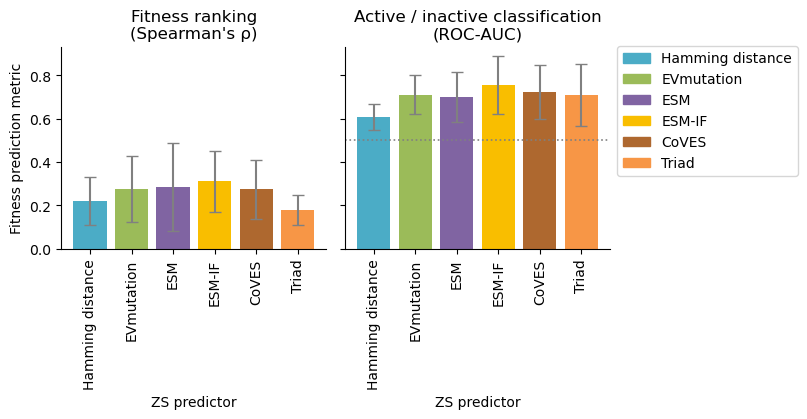

In [112]:
# Plotting
fig, axes = plt.subplots(1,2, figsize=(6, 4), sharey=True)

for m, ax in zip(avg_bar_type_df["metric"].unique(), axes):

    slice_m = avg_bar_type_df[(avg_bar_type_df["metric"] == m) & (avg_bar_type_df["type_"] == "Both")].copy()

        # Perform t-tests between each pair of ZS predictors within the metric
    p_values = {}
    for zs1 in ZS_OPTS:
        for zs2 in ZS_OPTS:
            if zs1 < zs2:  # To ensure each pair is only tested once
                group1 = slice_m[slice_m['zs'] == zs1]['value']
                group2 = slice_m[slice_m['zs'] == zs2]['value']
                _, p_value = ttest_ind(group1, group2)
                p_values[f"{zs1} vs {zs2}"] = p_value

    means = slice_m[slice_m["calc"] == "mean"]["value"].tolist()

    bars = ax.bar(
        [ZS_OPTS_APPENDED[zs] for zs in ZS_OPTS],
        means,
        yerr=slice_m[slice_m["calc"] == "std"]["value"].tolist(),
        capsize=4,
        color=[
            five_zs[c]
            for c in ZS_OPTS
        ],
        width=0.8,
        error_kw={'ecolor': 'gray', 'capthick': 1} 
    )

        # Annotating p-values
    for i, (pair, p_value) in enumerate(p_values.items()):
        if p_value < 0.05:
            ax.text(i, max(means) + 10, "*", ha="center", color="gray")



# Show p-values on the bars
# for bar, pvalue in zip(bars, p_dict.values()):
#     y = bar.get_height()
#     ax.text(bar.get_x() + bar.get_width() / 2, y, f'p={pvalue:.3f}', ha='center', va='bottom' if y < 0 else 'top', color='black')
# Hide the top and right spines

    if "classification" in m:
        ax.axhline(0.5, color='gray', linestyle='dotted', lw=1.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)  # Disable the y-axis grid lines

    ax.tick_params(axis='x', rotation=90)

    # Adding labels and titles
    ax.set_title(m)
    ax.set_xlabel("ZS predictor")
    # ax.set_ylabel(m)
axes[0].set_ylabel("Fitness prediction metric")

# Create custom handles for the legend
handles = [mpatches.Patch(color=five_zs[zs], label=ZS_OPTS_APPENDED[zs]) for zs in ZS_OPTS]

# Create a figure-wide legend
fig.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 0.925)) # title="ZS Predictor")
plt.tight_layout(pad=.0, h_pad=-.0, w_pad=1.0)
# ax.set_title("MSA correlation with different ZS scores")

ed_score t=1.731 and p=0.211
ev_score t=1.734 and p=0.168
esm_score t=1.293 and p=0.309
esmif_score t=3.310 and p=0.052
coves_score t=3.636 and p=0.057
Triad_score t=4.324 and p=0.002


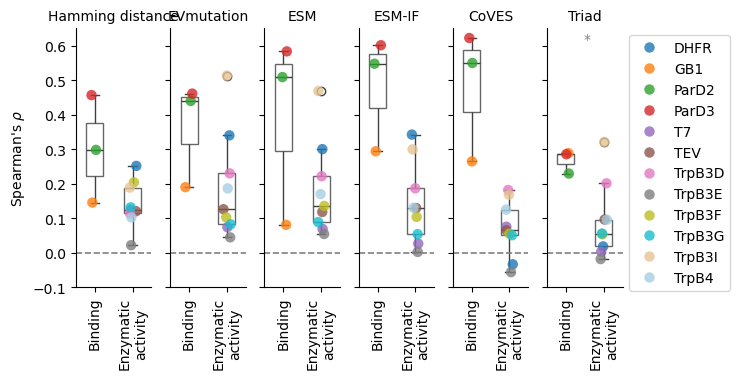

In [113]:
fig, axes = plt.subplots(1, 6, figsize=(7.2, 3.6), sharey=True)

for z, zs in enumerate(ZS_OPTS):
    ax = axes.flatten()[z]
    x = "all_" + zs.split("_")[0] + "_rho"
    bar_type_df = slice_zs[["lib", "type", x]].sort_values(["lib", "type"]).copy()

    sns.boxplot(
        # x="Type", y="Rho",
        x="type",
        y=x,
        data=bar_type_df,
        order=["Binding", "Enzymatic activity"],
        width=0.45,
        ax=ax,
        # color=PRESENTATION_PALETTE_SATURATE["light_gray"],# palette="pastel", showmeans=True
        boxprops={
            "facecolor": "None",
            "edgecolor": PRESENTATION_PALETTE_SATURATE["gray"],
        },
    )
    sns.stripplot(
        # x="Type",
        # y="Rho",
        x="type",
        y=x,
        data=bar_type_df,
        order=["Binding", "Enzymatic activity"],
        hue="lib",
        hue_order=bar_type_df["lib"].unique(),
        jitter=True,
        size=7.5,
        # dodge=True,
        palette=sns.color_palette("tab10").as_hex() + ['#e5c494', '#a6cee3'],
        marker="o",
        alpha=0.8,
        ax=ax,
    )

    labels = [
        label.get_text()
        .replace("Enzymatic activity", "Enzymatic\nactivity")
        # .replace("Binding", "Binding\ninteraction")
        for label in ax.get_xticklabels()
    ]
    ax.set_xlabel("")
    ax.set_xticklabels(labels, rotation=90, ha="center")
    ax.set_ylim(-0.1, 0.65)
    # ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
    ax.set_title(ZS_OPTS_LEGEND[x.split("_")[1] + "_score"], fontsize=10)
    ax.axhline(0, color='gray', lw=1.2, ls='--')

    # Hide the top and right spine
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    if z != len(ZS_OPTS) - 1:
        ax.legend().remove()
    else:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1.0))
    if z == 0:
        ax.set_ylabel(r"Spearman's $\rho$")
    else:
        ax.set_ylabel("")

    t_val, p_value = ttest_ind(
        list(bar_type_df[bar_type_df["type"] == "Binding"][x]),
        list(bar_type_df[bar_type_df["type"] == "Enzymatic activity"][x]),
        equal_var=False, nan_policy='omit'
    )
    # print(bar_type_df[bar_type_df["type"] == "Binding"][x])
    # print(bar_type_df[bar_type_df["type"] == "Enzymatic activity"][x])
    # significance = '*' if p_value < 0.05 else 'ns'  # ns stands for not significant
    print(f"{zs} t={t_val:.3f} and p={p_value:.3f}")

    # Draw a line between points
    p = 0.1
    q = 1
    annot_y = 0.6
    if p_value < 0.05:
        # ax.plot([p+0.5*(q-p), q-0.5*(q-p)], [annot_y, annot_y], color='gray', lw=1.5)
        ax.text((p + q) * 0.5, annot_y, "*", ha="center", va="bottom", color="gray")
        
    # if z == 2:
    #     ax.set_xlabel("ZS type")
    # else:
    #
    # # plt.title("Triad ZS statistically different for types")
    # plt.ylabel("Type")
    # plt.xlabel(ZS_OPTS_LEGEND[x.split("_")[1]+"_score"] + r"’s fitness prediction Spearman's $\rho$")
    # # plt.legend(title="Group", loc="upper left", bbox_to_anchor=(1, 1.05))
    # plt.legend().remove()
plt.tight_layout(pad=0, h_pad=-0.0, w_pad=1.0)

ed_score : t=-2.381 and p=0.042
ev_score : t=-1.669 and p=0.126
esm_score : t=-0.746 and p=0.493
esmif_score : t=0.751 and p=0.493
coves_score : t=1.289 and p=0.279
Triad_score : t=1.104 and p=0.333


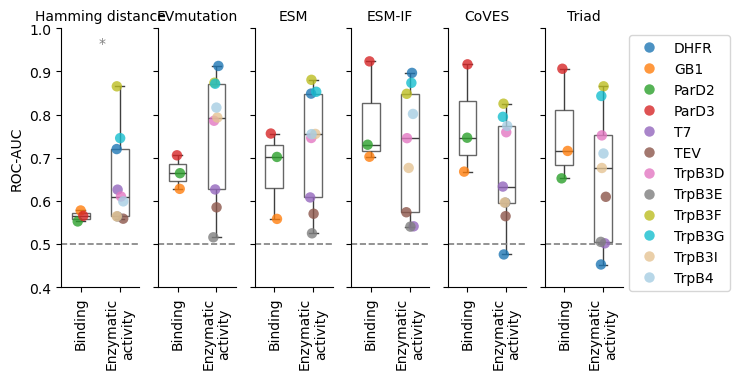

In [114]:
fig, axes = plt.subplots(1, 6, figsize=(7.2, 3.6), sharey=True)

for z, zs in enumerate(ZS_OPTS):
    ax = axes.flatten()[z]
    x = "all_" + zs.split("_")[0] + "_rocauc"
    bar_type_df = slice_zs[["lib", "type", x]].sort_values(["lib", "type"]).copy()

    sns.boxplot(
        # x="Type", y="Rho", 
        x="type", y=x, 
        data=bar_type_df, width=0.45, 
        ax=ax,
        order=["Binding", "Enzymatic activity"],
        # color=PRESENTATION_PALETTE_SATURATE["light_gray"],# palette="pastel", showmeans=True
        boxprops={'facecolor': 'None', 'edgecolor': PRESENTATION_PALETTE_SATURATE["gray"]},
    )
    sns.stripplot(
        # x="Type",
        # y="Rho",
        x="type",
        y=x,
        data=bar_type_df,
        order=bar_type_df['type'].unique(),
        hue="lib",
        hue_order=bar_type_df['lib'].unique(),
        jitter=True,
        size=7.5,
        # dodge=True,
        palette=sns.color_palette("tab10").as_hex() + ['#e5c494', '#a6cee3'],
        marker="o",
        alpha=0.8,
        ax=ax
    )

    labels = [label.get_text().replace('Enzymatic activity', 'Enzymatic\nactivity') for label in ax.get_xticklabels()]
    ax.set_xlabel("")
    ax.set_xticklabels( labels, rotation=90, ha="center")
    ax.set_ylim(0.4, 1)
    # ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
    ax.set_title(ZS_OPTS_LEGEND[x.split("_")[1]+"_score"], fontsize=10)
    
    # Hide the top and right spine
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.axhline(0.5, color='gray', lw=1.2, ls='--')
    
    
    if z != len(ZS_OPTS)-1:
        ax.legend().remove()
    else:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1.0))
    if z == 0:
        ax.set_ylabel("ROC-AUC")
    else:
        ax.set_ylabel("")

    t_val, p_value = ttest_ind(
        list(bar_type_df[bar_type_df["type"]=="Binding"][x]),
        list(bar_type_df[bar_type_df["type"]=="Enzymatic activity"][x]),
        equal_var=False, nan_policy='omit'
    )

    
    # significance = '*' if p_value < 0.05 else 'ns'  # ns stands for not significant
    print(f"{zs} : t={t_val:.3f} and p={p_value:.3f}")

    # Draw a line between points
    p = 0.1
    q = 1
    annot_y = 0.95
    if p_value < 0.05:
        # ax.plot([p+0.5*(q-p), q-0.5*(q-p)], [annot_y, annot_y], color='gray', lw=1.5)
        ax.text((p+q)*.5, annot_y, "*", ha='center', va='bottom', color='gray')

    # if z == 2:
    #     ax.set_xlabel("ZS type")
    # else:
    #     
    # # plt.title("Triad ZS statistically different for types")
    # plt.ylabel("Type")
    # plt.xlabel(ZS_OPTS_LEGEND[x.split("_")[1]+"_score"] + r"’s fitness prediction Spearman's $\rho$")
    # # plt.legend(title="Group", loc="upper left", bbox_to_anchor=(1, 1.05))
    # plt.legend().remove()
plt.tight_layout(pad=0, h_pad=-.0, w_pad=1.0)

In [115]:
get_msa_dict = {}

for l, v in EV_META.items():
    if l != "TrpB":
        if "chosen" in v.keys():
            get_msa_dict[l] = v["chosen"]["sequences"]
        else:
            get_msa_dict[l] = v["recommended"]["sequences"]
    else:
        ls = [l+ "3"+ app for app in [chr(i) for i in range(ord('A'), ord('I')+1)]]+ ["TrpB4"]
        for t in ls:
            if "chosen" in v.keys():
                get_msa_dict[t] = v["chosen"]["sequences"]
            else:
                get_msa_dict[t] = v["recommended"]["sequences"]

msa_df = pd.DataFrame(get_msa_dict, index=["MSA"]).T.reset_index()
msa_df.columns=["lib", "msa"]
msa_df

,lib,msa
0,DHFR,16042
1,ParD2,6789
2,ParD3,6784
3,GB1,29
4,T7,309
5,TEV,164
6,TrpB3A,5816
7,TrpB3B,5816
8,TrpB3C,5816
9,TrpB3D,5816


In [116]:
zs_append_msa = pd.merge(zs_df, msa_df, on="lib")
zs_append_msa

,lib,all_ed_rho,all_ed_ndcg,all_ed_rocauc,all_ev_rho,all_ev_ndcg,all_ev_rocauc,all_esm_rho,all_esm_ndcg,all_esm_rocauc,...,single_msa-comb_ndcg,single_msa-comb_rocauc,single_structnmsa-comb_rho,single_structnmsa-comb_ndcg,single_structnmsa-comb_rocauc,single_two-best_rho,single_two-best_ndcg,single_two-best_rocauc,type,msa
0,DHFR,0.251154,0.914803,0.719973,0.339650,0.947058,0.912765,0.299715,0.934129,0.848592,...,0.891577,0.911111,-0.212895,0.800908,0.320833,0.555344,0.897379,0.900000,Enzymatic activity,16042
1,GB1,0.144928,0.687396,0.577572,0.189509,0.721558,0.627690,0.080335,0.701680,0.558014,...,0.784778,0.897363,0.811746,0.786033,0.916196,0.779265,0.788547,0.898305,Binding,29
2,ParD2,0.297552,0.943588,0.552103,0.439506,0.950963,0.664011,0.508609,0.968482,0.701737,...,0.977412,0.947368,0.687594,0.988506,0.964912,0.674367,0.976621,0.947368,Binding,6789
3,ParD3,0.456371,0.969538,0.564976,0.460817,0.971281,0.705520,0.583158,0.982041,0.755986,...,0.995510,NaN,0.337783,0.993260,NaN,0.362577,0.995431,NaN,Binding,6784
4,T7,0.123445,0.611561,0.625880,0.073662,0.619888,0.626332,0.068403,0.595811,0.607808,...,0.818903,0.662222,0.278265,0.743581,0.771111,0.247554,0.826064,0.666667,Enzymatic activity,309
5,TEV,0.119715,0.992653,0.558518,0.125519,0.993482,0.584816,0.117589,0.993142,0.570008,...,0.964957,0.886570,0.732557,0.962853,0.868421,0.734003,0.967017,0.886570,Enzymatic activity,164
6,TrpB3A,0.177658,0.987543,0.608694,0.130969,0.989105,0.657328,0.199229,0.988920,0.690492,...,0.967964,0.850694,0.191181,0.877321,0.646991,0.441304,0.967677,0.863426,Enzymatic activity,5816
7,TrpB3B,0.021137,0.987234,0.551217,0.074495,0.988502,0.583225,0.053335,0.988071,0.659787,...,0.972462,0.981481,0.176627,0.941640,0.796296,0.367140,0.975559,0.972222,Enzymatic activity,5816
8,TrpB3C,0.064914,0.983205,0.605496,0.111510,0.984379,0.539872,0.065783,0.984411,0.580109,...,0.959543,1.000000,0.277220,0.954619,0.996970,0.386139,0.950518,0.993939,Enzymatic activity,5816
9,TrpB3D,0.113428,0.972850,0.609910,0.229525,0.980522,0.785684,0.221182,0.979785,0.745673,...,0.867780,0.682382,0.378123,0.831905,0.699132,0.377664,0.851802,0.678040,Enzymatic activity,5816


In [117]:
zs_append_msa["all_esm_rho"]

0     0.299715
1     0.080335
2     0.508609
3     0.583158
4     0.068403
5     0.117589
6     0.199229
7     0.053335
8     0.065783
9     0.221182
10    0.053775
11    0.135039
12    0.088313
13   -0.036845
14    0.468354
15    0.169546
Name: all_esm_rho, dtype: float64

In [118]:
zs_metric_map = {
    "rho": "Fitness ranking\n(Spearman's ρ)",
    "rocauc": "Active / inactive classification\n(ROC-AUC)"
}


In [119]:
slice_zs = zs_append_msa[zs_append_msa["lib"].isin(active_lib_list)]

# rho_dict = {}
# p_dict = {}

# rho_dict_bind = {}
# p_dict_bind = {}

# rho_dict_ea = {}
# p_dict_ea = {}

df_msa = pd.DataFrame()

for zs in ZS_OPTS:
    for m in ["rho", "rocauc"]:
        zs_col = "all_" + zs.replace("score", m)

        # for t in ["Binding", "Enzymatic activity"]:
        #     type_df = slice_zs[slice_zs["type"] == t]
            
        #     zs_rho_ea, zs_p_ea = spearmanr(type_df[zs_col], type_df["msa"])
        #     df_msa = df_msa._append({"type":t, "zs": zs, "metric": m, "value": zs_rho_ea, "p": zs_p_ea}, ignore_index=True)

        zs_rho_both, zs_p_both= spearmanr(slice_zs[zs_col], slice_zs["msa"])
        df_msa = df_msa._append({"type": "Both", "zs": zs, "metric": m, "value": zs_rho_both, "p": zs_p_both}, ignore_index=True)

df_msa["zs"] = df_msa["zs"].map(ZS_OPTS_LEGEND)
df_msa["metric"] = df_msa["metric"].map(zs_metric_map)
df_msa = df_msa.replace({"Binding": "Binding interaction"})

df_msa

,type,zs,metric,value,p
0,Both,Hamming distance,Fitness ranking\n(Spearman's ρ),0.541188,0.069203
1,Both,Hamming distance,Active / inactive classification\n(ROC-AUC),0.026126,0.935763
2,Both,EVmutation,Fitness ranking\n(Spearman's ρ),0.485203,0.109835
3,Both,EVmutation,Active / inactive classification\n(ROC-AUC),0.507597,0.092058
4,Both,ESM,Fitness ranking\n(Spearman's ρ),0.709143,0.009810
5,Both,ESM,Active / inactive classification\n(ROC-AUC),0.526259,0.078814
6,Both,ESM-IF,Fitness ranking\n(Spearman's ρ),0.544920,0.066933
7,Both,ESM-IF,Active / inactive classification\n(ROC-AUC),0.608370,0.035814
8,Both,CoVES,Fitness ranking\n(Spearman's ρ),0.029859,0.926607
9,Both,CoVES,Active / inactive classification\n(ROC-AUC),0.145561,0.651713


Fitness ranking
(Spearman's ρ) ed_score: rho=0.541, p=0.069
Fitness ranking
(Spearman's ρ) ev_score: rho=0.485, p=0.110
Fitness ranking
(Spearman's ρ) esm_score: rho=0.709, p=0.010
is significant!
Fitness ranking
(Spearman's ρ) esmif_score: rho=0.545, p=0.067
Fitness ranking
(Spearman's ρ) coves_score: rho=0.030, p=0.927
Fitness ranking
(Spearman's ρ) Triad_score: rho=-0.052, p=0.872
Active / inactive classification
(ROC-AUC) ed_score: rho=0.026, p=0.936
Active / inactive classification
(ROC-AUC) ev_score: rho=0.508, p=0.092
Active / inactive classification
(ROC-AUC) esm_score: rho=0.526, p=0.079
Active / inactive classification
(ROC-AUC) esmif_score: rho=0.608, p=0.036
is significant!
Active / inactive classification
(ROC-AUC) coves_score: rho=0.146, p=0.652
Active / inactive classification
(ROC-AUC) Triad_score: rho=0.007, p=0.982


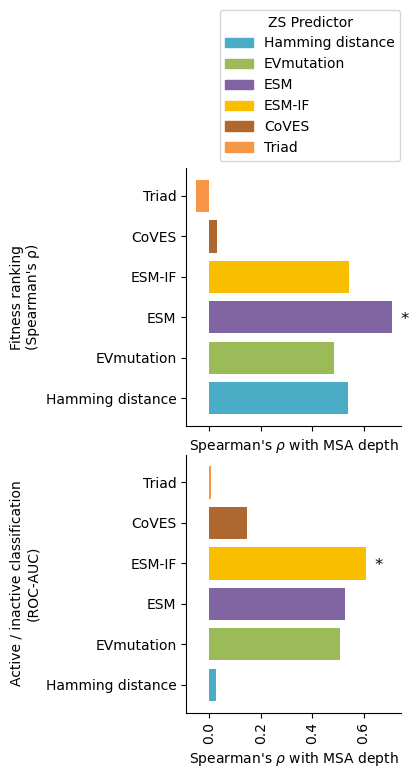

In [120]:
fig, axes = plt.subplots(2, 1, figsize=(4, 6), sharex=True)

for i, (m, ax) in enumerate(zip(df_msa["metric"].unique(), axes)):
    # Filter for the specific metric and type
    slice_m = df_msa[(df_msa["metric"] == m) & (df_msa["type"] == "Both")].copy()

    # Plot the bars
    bars = ax.barh(
        [ZS_OPTS_APPENDED[zs] for zs in ZS_OPTS],
        slice_m["value"],
        color=[five_zs[c] for c in ZS_OPTS],
        height=0.8
    )

    # Annotate p-values on the bars
    for j, bar in enumerate(bars):
        # Get the p-value corresponding to this bar
        p_val = slice_m["p"].values[j]  # Assuming the p-values are in the "p" column
        rho_val = slice_m["value"].values[j]  # Corresponding rho value

        print(f"{m} {ZS_OPTS[j]}: rho={rho_val:.3f}, p={p_val:.3f}")

        # Annotate the p-value or a significance marker
        if p_val < 0.05:
            print("is significant!")
            ax.text(
                bar.get_width() + 0.05, bar.get_y() + bar.get_height() / 2 - 0.05,
                "*", ha="center", va="center", color="black", fontsize=12
            )
        # else:
        #     ax.text(
        #         bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2,
        #         f"p={p_val:.3f}", ha="left", va="center", color="black"
        #     )

    # Hide the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)  # Disable the y-axis grid lines

    ax.set_xlabel(r"Spearman's $\rho$ with MSA depth")
    
    # Adding labels and titles
    ax.set_ylabel(m)
    ax.tick_params(axis='x', rotation=90)

# Create custom handles for the legend
handles = [mpatches.Patch(color=five_zs[zs], label=ZS_OPTS_APPENDED[zs]) for zs in ZS_OPTS]

# Create a figure-wide legend
fig.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.75, 1.275), title="ZS Predictor")
plt.tight_layout(pad=.0, h_pad=-.0, w_pad=1.0)

plt.show()
